In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


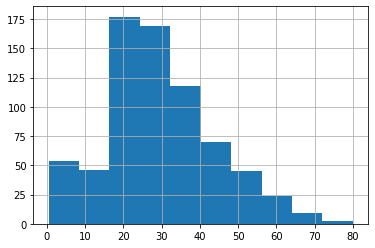

In [7]:
df['Age'].hist()

In [19]:
df['Age'].value_counts().nlargest(5)

24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
Name: Age, dtype: int64

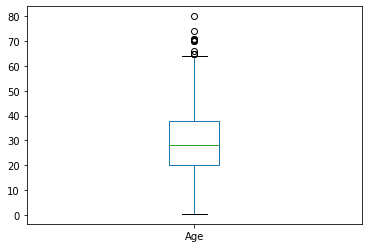

In [29]:
df['Age'].plot.box()

In [39]:
x=df['Age'].mean()
df['Age'].fillna(x,inplace=True)
df['Age']=df['Age'].astype('int')

In [48]:
mask=df['Age']>60
mask1=df['Age']<80
df=df[mask & mask1]


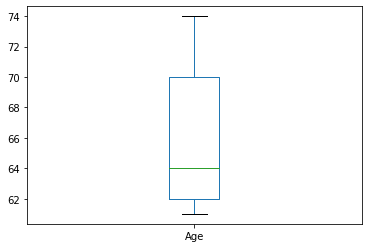

In [49]:
df['Age'].plot.box()

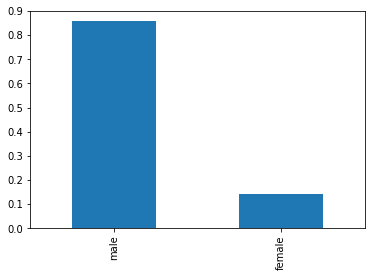

In [59]:
(df['Sex'].value_counts()/len(df['Sex'])).plot.bar()

In [90]:
file=pd.read_csv('titanic.csv')
file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
pd.crosstab(file['Sex'],file['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


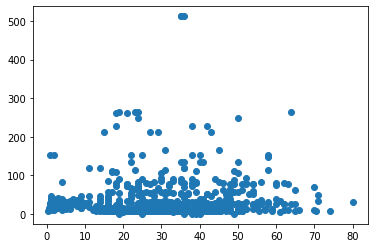

In [65]:
plt.scatter(file['Age'],file['Fare'])

In [69]:
file['Age'].corr(file['Fare'])

0.0960666917690389

In [91]:
mask=(file['Fare']<300) 
file=file[mask]


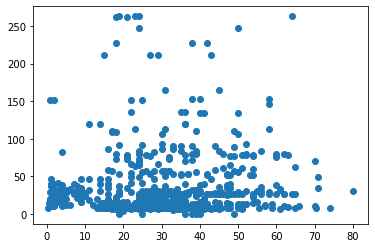

In [93]:
plt.scatter(file['Age'],file['Fare'])

In [101]:
file.groupby('Sex')['Age'].mean()


Sex
female    27.888462
male      30.705477
Name: Age, dtype: float64

In [109]:
from scipy.stats import chi2_contingency as cc
cc(pd.crosstab(file['Sex'],file['Survived']))


(262.28250014655595,
 5.457500875296423e-59,
 1,
 array([[193.51013514, 119.48986486],
        [355.48986486, 219.51013514]]))

In [121]:
from scipy.stats import ttest_ind as tt
males=file[file['Sex']=='male']
females=file[file['Sex']=='female']
tt(males['Age'],females['Age'],nan_policy='onit')

ValueError: nan_policy must be one of {'propagate', 'raise', 'omit'}